In [1]:
import pandas as pd
import numpy as np

In [2]:
import dowhy
from dowhy import CausalModel

## Load in WDI data

In [3]:
wdi = pd.read_csv('../data/wdi/WDIData.csv')
wdi.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,83.120303,83.533457,83.897596,84.171599,84.510171,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,87.512260,88.129881,87.275323,88.720097,89.308602,90.283638,89.286856,NaN,NaN,NaN
2,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,77.251714,78.165706,75.512153,78.211000,79.065508,81.102134,79.248100,NaN,NaN,NaN
3,Arab World,ARB,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,96.435957,96.772853,96.466705,96.936319,97.290083,97.467915,97.063959,NaN,NaN,NaN
4,Arab World,ARB,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,30.277130,NaN,NaN,37.165211,NaN,NaN,NaN,NaN


In [4]:
series_df = pd.read_csv('../data/wdi/WDISeries.csv')
series_df[series_df['Indicator Name'].str.contains('per capita')]

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
183,DT.ODA.ODAT.PC.ZS,Economic Policy & Debt: Official development a...,Net ODA received per capita (current US$),Net official development assistance per capita...,Net official development assistance (ODA) per ...,NaN,Annual,NaN,NaN,Weighted Average,...,NaN,NaN,Development Assistance Committee of the Organi...,Net official development assistance (ODA) per ...,The ratio of aid per capita provides a measure...,NaN,NaN,NaN,CC BY-4.0,NaN
218,EG.USE.ELEC.KH.PC,Environment: Energy production & use,Electric power consumption (kWh per capita),NaN,Electric power consumption measures the produc...,NaN,Annual,NaN,NaN,Weighted Average,...,NaN,Restricted use: Please contact the Internation...,IEA Statistics © OECD/IEA 2014 (http://www.iea...,Electric power consumption per capita (kWh ) i...,An economy's production and consumption of ele...,NaN,NaN,NaN,Use and distribution of these data are subject...,NaN
219,EG.USE.PCAP.KG.OE,Environment: Energy production & use,Energy use (kg of oil equivalent per capita),NaN,Energy use refers to use of primary energy bef...,NaN,Annual,NaN,NaN,Weighted Average,...,NaN,Restricted use: Please contact the Internation...,IEA Statistics © OECD/IEA 2014 (http://www.iea...,Total energy use refers to the use of primary ...,In developing economies growth in energy use i...,NaN,NaN,NaN,Use and distribution of these data are subject...,NaN
227,EN.ATM.CO2E.PC,Environment: Emissions,CO2 emissions (metric tons per capita),NaN,Carbon dioxide emissions are those stemming fr...,NaN,Annual,NaN,NaN,Weighted Average,...,NaN,NaN,"Carbon Dioxide Information Analysis Center, En...","Carbon dioxide emissions, largely by-products ...",Carbon dioxide (CO2) is naturally occurring ga...,NaN,NaN,NaN,CC BY-4.0,NaN
290,ER.H2O.INTR.PC,Environment: Freshwater,Renewable internal freshwater resources per ca...,NaN,Renewable internal freshwater resources flows ...,NaN,Annual,NaN,NaN,Weighted Average,...,NaN,NaN,"Food and Agriculture Organization, AQUASTAT data.",Renewable water resources (internal and extern...,UNESCO estimates that in developing countries ...,NaN,NaN,NaN,CC BY-4.0,NaN
436,IC.REG.COST.PC.FE.ZS,Private Sector & Trade: Business environment,"Cost of business start-up procedures, female (...",NaN,Cost to register a business is normalized by p...,NaN,Annual,NaN,NaN,Unweighted average,...,NaN,Data are presented for the survey year instead...,"World Bank, Doing Business project (http://www...",Data are collected by the World Bank with a st...,The economic health of a country is measured n...,NaN,NaN,NaN,CC BY-4.0,NaN
437,IC.REG.COST.PC.MA.ZS,Private Sector & Trade: Business environment,"Cost of business start-up procedures, male (% ...",NaN,Cost to register a business is normalized by p...,NaN,Annual,NaN,NaN,Unweighted average,...,NaN,Data are presented for the survey year instead...,"World Bank, Doing Business project (http://www...",Data are collected by the World Bank with a st...,The economic health of a country is measured n...,NaN,NaN,NaN,CC BY-4.0,NaN
438,IC.REG.COST.PC.ZS,Private Sector & Trade: Business environment,Cost of business start-up procedures (% of GNI...,NaN,Cost to register a business is normalized by p...,NaN,Annual,NaN,NaN,Unweighted average,...,NaN,Data are presented for the survey year instead...,"World Bank, Doing Business project (http://www...",Data are collected by the World Bank with a st...,The economic health of a country is measured n...,NaN,NaN,NaN,CC BY-4.0,NaN
544,NE.CON.PRVT.PC.KD,Economic Policy & Debt: National accounts: US$...,Household final consumption expenditure per ca...,NaN,Household final consumption expenditure per ca...,NaN,Annual,2010,NaN,Weighted Average,.

In [5]:
gdp_growth_series = ['NY.GDP.PCAP.KD.ZG']
gdppc_df = wdi[wdi['Indicator Code'] == gdp_growth_series[0]]
gdppc_df[gdppc_df["Country Name"].str.contains("World")]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
474,Arab World,ARB,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,4.283180,1.039802,0.337680,1.126316,1.458590,-1.106609,0.160482,-0.428807,NaN,NaN
66484,World,WLD,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,NaN,2.905912,3.765014,3.20086,4.566841,3.39498,...,1.319074,1.464922,1.661578,1.686013,1.426476,2.132158,1.852047,1.254680,NaN,NaN


In [6]:
project_df = pd.read_csv('../data/aid_projects.csv', low_memory=False)
project_df.head()

,ppd_project_id,donor_name,six_overall_rating,country_code,office_presence,project_duration,eval_lag,crs_purpose_code,crs_purpose_sector,aid_type,...,kfw_sustainability_rating,ifad_government_partner_rating,wb_government_partner_rating,mmg_purpose_sector,mmg_purpose_sectorname,mmg_purpose_code,mmg_purpose_codename,wb_project_id,gfatm_project_id,giz_project_id
0,1,AsianDB,4.5,CHN,1.0,2555.0,730.0,NaN,NaN,NaN,...,NaN,NaN,NaN,14020,Water supply and sanitation - large systems,140,WATER AND SANITATION,NaN,NaN,NaN
1,2,AsianDB,4.5,COO,0.0,1825.0,0.0,22040.0,220.0,L,...,NaN,NaN,NaN,22040,Information and communication technology (ICT),220,COMMUNICATION,NaN,NaN,NaN
2,3,AsianDB,1.5,PHI,1.0,2190.0,730.0,NaN,NaN,NaN,...,NaN,NaN,NaN,14010,Water sector policy and administrative management,140,WATER AND SANITATION,NaN,NaN,NaN
3,4,AsianDB,4.5,NEP,1.0,6570.0,1095.0,21050.0,210.0,L,...,NaN,NaN,NaN,21050,Air transport,210,TRANSPORT AND STORAGE,NaN,NaN,NaN
4,5,AsianDB,4.5,SRI,1.0,1825.0,0.0,24010.0,240.0,L,...,NaN,NaN,NaN,24010,Financial policy and administrative management,240,BANKING AND FINANCIAL SERVICES,NaN,NaN,NaN


In [7]:
project_df.donor_name.value_counts()

WB         7146
KfW        2229
DFID       1917
AsianDB    1572
JICA        723
GFATM       581
GiZ         129
IFAD         55
Name: donor_name, dtype: int64

In [8]:
wb_pdf = project_df[project_df.donor_name == 'WB']
print("Number WB projects with clean match to WDI country code: ", len(wb_pdf[wb_pdf.country_code.isin(gdppc_df['Country Code'])]))

Number WB projects with clean match to WDI country code:  3681


In [9]:
df = wb_pdf[wb_pdf.country_code.isin(gdppc_df['Country Code'])]
df.head()

,ppd_project_id,donor_name,six_overall_rating,country_code,office_presence,project_duration,eval_lag,crs_purpose_code,crs_purpose_sector,aid_type,...,kfw_sustainability_rating,ifad_government_partner_rating,wb_government_partner_rating,mmg_purpose_sector,mmg_purpose_sectorname,mmg_purpose_code,mmg_purpose_codename,wb_project_id,gfatm_project_id,giz_project_id
6496,7208,WB,5.0,GUY,1.0,1095.0,365.0,31140.0,311.0,L,...,NaN,NaN,5.0,31140,Agricultural water resources,311,AGRICULTURE,P057271,NaN,NaN
6497,7209,WB,5.0,IND,1.0,2555.0,1460.0,24010.0,240.0,L,...,NaN,NaN,NaN,24010,Financial policy and administrative management,240,BANKING AND FINANCIAL SERVICES,P009674,NaN,NaN
6498,7210,WB,6.0,COL,1.0,730.0,730.0,23050.0,230.0,NaN,...,NaN,NaN,6.0,23050,Gas distribution,230,ENERGY GENERATION AND SUPPLY,P102095,NaN,NaN
6500,7212,WB,5.0,BRA,1.0,1825.0,365.0,43040.0,430.0,NaN,...,NaN,NaN,5.0,43040,Rural development,430,Other multisector,P043871,NaN,NaN
6502,7214,WB,5.0,PAK,1.0,1825.0,365.0,11220.0,112.0,L,...,NaN,NaN,5.0,11220,Primary education,112,Basic education -,P010415,NaN,NaN


In [10]:
relevant_cols = [
    'wb_project_id', 
     'country_code',
     'six_overall_rating', 
     'wb_government_partner_rating', 
     'eval_lag', 
     'project_duration',
     'project_name',
     'original_overall_rating',
     'wb_lendingproject_cost',
     'wb_lendinginstrumenttype',
     'wb_qualityatentry_rating',
     'wb_supervisionquality_rating',
     'wb_owninstperformance_rating',
     'start_date',
     'completion_date',
     'evaluation_date'
]

In [11]:
df = df[relevant_cols]
df['start_dt'] = pd.to_datetime(df.start_date, format='%d%b%Y', errors='coerce')
df['start_year'] = df.start_dt.dt.year
df['completion_dt'] = pd.to_datetime(df.completion_date, format='%d%b%Y', errors='coerce')
df['end_year'] = df.completion_dt.dt.year

In [12]:
df.head()

,wb_project_id,country_code,six_overall_rating,wb_government_partner_rating,eval_lag,project_duration,project_name,original_overall_rating,wb_lendingproject_cost,wb_lendinginstrumenttype,wb_qualityatentry_rating,wb_supervisionquality_rating,wb_owninstperformance_rating,start_date,completion_date,evaluation_date,start_dt,start_year,completion_dt,end_year
6496,P057271,GUY,5.0,5.0,365.0,1095.0,Emergency Assistance Project,5.0,10200000.0,ERL,5.0,5.0,5.0,01jan1999,01jan2002,01jan2003,1999-01-01,1999,2002-01-01,2002.0
6497,P009674,IND,5.0,NaN,1460.0,2555.0,(DFC) IDBI I,5.0,0.0,FIL,NaN,NaN,NaN,01sep1973,01jan1980,01jan1984,1973-09-01,1973,1980-01-01,1980.0
6498,P102095,COL,6.0,6.0,730.0,730.0,(LKD) GPOBA W3: Colombia Natural Gas,6.0,5085000.0,SIL,5.0,5.0,5.0,01jan2006,01jan2008,01jan2010,2006-01-01,2006,2008-01-01,2008.0
6500,P043871,BRA,5.0,5.0,365.0,1825.0,(PIAUI)R.POVERTY,5.0,40000000.0,SIL,5.0,5.0,5.0,12dec1996,01jan2002,01jan2003,1996-12-12,1996,2002-01-01,2002.0
6502,P010415,PAK,5.0,5.0,365.0,1825.0,1992 FLOOD DAMAGE RE,5.0,397200000.0,ERL,5.0,5.0,5.0,03apr1993,01jan1998,01jan1999,1993-04-03,1993,1998-01-01,1998.0


In [13]:
project = df.iloc[0].to_dict()
project

{'wb_project_id': 'P057271',
 'country_code': 'GUY',
 'six_overall_rating': 5.0,
 'wb_government_partner_rating': 5.0,
 'eval_lag': 365.0,
 'project_duration': 1095.0,
 'project_name': ' Emergency Assistance Project',
 'original_overall_rating': 5.0,
 'wb_lendingproject_cost': 10200000.0,
 'wb_lendinginstrumenttype': 'ERL',
 'wb_qualityatentry_rating': 5.0,
 'wb_supervisionquality_rating': 5.0,
 'wb_owninstperformance_rating': 5.0,
 'start_date': '01jan1999',
 'completion_date': '01jan2002',
 'evaluation_date': '01jan2003',
 'start_dt': Timestamp('1999-01-01 00:00:00'),
 'start_year': 1999,
 'completion_dt': Timestamp('2002-01-01 00:00:00'),
 'end_year': 2002.0}

In [14]:
gdppc_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Unnamed: 65'],
      dtype='object')

In [120]:
def extract_prior_growth(project, country_code_to_use, num_years=5):
    gdpcc_country = gdppc_df[(gdppc_df['Country Code'] == country_code_to_use)]
    years_for_growth = [str(project['start_year'] - (i + 1)) for i in range(num_years)]
    years_for_growth = [year for year in years_for_growth if int(year) > 1960]
    growth_figures = gdpcc_country.iloc[0][years_for_growth].to_list()
    growth_figures = [gf for gf in growth_figures if not np.isnan(gf)]
    return sum(growth_figures) / len(growth_figures) if len(growth_figures) > 0 else 0

In [122]:
def extract_prior_growth_and_global(project):
    project["prior_growth"] = extract_prior_growth(project, project['country_code'])
    project["global_growth_prior"] = extract_prior_growth(project, "WLD")
    return project

In [123]:
extract_prior_growth_and_global(project)

{'wb_project_id': 'P057271',
 'country_code': 'GUY',
 'six_overall_rating': 5.0,
 'wb_government_partner_rating': 5.0,
 'eval_lag': 365.0,
 'project_duration': 1095.0,
 'project_name': ' Emergency Assistance Project',
 'original_overall_rating': 5.0,
 'wb_lendingproject_cost': 10200000.0,
 'wb_lendinginstrumenttype': 'ERL',
 'wb_qualityatentry_rating': 5.0,
 'wb_supervisionquality_rating': 5.0,
 'wb_owninstperformance_rating': 5.0,
 'start_date': '01jan1999',
 'completion_date': '01jan2002',
 'evaluation_date': '01jan2003',
 'start_dt': Timestamp('1999-01-01 00:00:00'),
 'start_year': 1999,
 'completion_dt': Timestamp('2002-01-01 00:00:00'),
 'end_year': 2002.0,
 'future_growth': 2.2145603861732424,
 'global_growth_post': 2.715864689653008,
 'growth_during': 0.7011928383593666,
 'global_growth_during': 1.8744232982929852,
 'prior_growth': 5.204767829212794,
 'global_growth_prior': 1.60503590038959}

In [17]:
def extract_post_growth(country_code, end_year, num_years=5):
    gdpcc_country = gdppc_df[(gdppc_df['Country Code'] == country_code)]
    if np.isnan(end_year):
        return np.nan
    
    convert_to_year = lambda i: str(int(end_year) + i) 
    years_for_growth = [convert_to_year(i+1) for i in range(num_years) if int(convert_to_year(i+1)) < 2021]
    growth_figures = gdpcc_country.iloc[0][years_for_growth].to_list()
    growth_figures = [gf for gf in growth_figures if not np.isnan(gf)]
    return sum(growth_figures) / len(growth_figures) if len(growth_figures) > 0 else 0

In [62]:
def extract_post_growth_and_global(project):
    project['future_growth'] = extract_post_growth(project['country_code'], project['end_year'])
    project['global_growth_post'] = extract_post_growth('WLD', project['end_year'])
    
    project_start = project['start_year'] if int(project['start_year']) > 1960 else 1960
    project['growth_during'] = extract_post_growth(project['country_code'], project_start)
    project['global_growth_during'] = extract_post_growth('WLD', project_start)
    
    return project

In [58]:
extract_post_growth_and_global(project)

{'wb_project_id': 'P057271',
 'country_code': 'GUY',
 'six_overall_rating': 5.0,
 'wb_government_partner_rating': 5.0,
 'eval_lag': 365.0,
 'project_duration': 1095.0,
 'project_name': ' Emergency Assistance Project',
 'original_overall_rating': 5.0,
 'wb_lendingproject_cost': 10200000.0,
 'wb_lendinginstrumenttype': 'ERL',
 'wb_qualityatentry_rating': 5.0,
 'wb_supervisionquality_rating': 5.0,
 'wb_owninstperformance_rating': 5.0,
 'start_date': '01jan1999',
 'completion_date': '01jan2002',
 'evaluation_date': '01jan2003',
 'start_dt': Timestamp('1999-01-01 00:00:00'),
 'start_year': 1999,
 'completion_dt': Timestamp('2002-01-01 00:00:00'),
 'end_year': 2002.0,
 'future_growth': 2.2145603861732424,
 'global_growth_post': 2.715864689653008,
 'growth_during': 0.7011928383593666,
 'global_growth_during': 1.8744232982929852}

In [124]:
df = df.apply(extract_prior_growth_and_global, axis=1)

<AxesSubplot:>

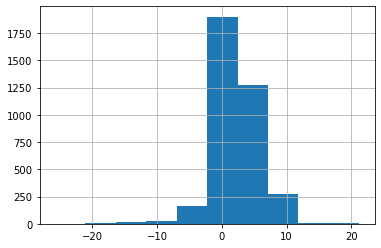

In [125]:
df.prior_growth.hist()

In [134]:
df[df.prior_growth < -20]

,wb_project_id,country_code,six_overall_rating,wb_government_partner_rating,eval_lag,project_duration,project_name,original_overall_rating,wb_lendingproject_cost,wb_lendinginstrumenttype,...,start_dt,start_year,completion_dt,end_year,prior_growth,future_growth,global_growth_post,growth_during,global_growth_during,global_growth_prior
9659,P008278,ARM,4.0,5.0,1095.0,1825.0,INSTITUTION BUILDING,4.0,17200000.0,TAL,...,1993-01-01,1993,1998-01-01,1998.0,-25.807674,9.847337,1.62583,7.436463,1.605036,1.160586


In [135]:
gdppc_df[(gdppc_df['Country Code'] == 'ARM')][['199' + str(i) for i in range(9)]]

,1990,1991,1992,1993,1994,1995,1996,1997,1998
79399,NaN,-10.870896,-40.744453,-6.638468,7.949921,9.103522,7.506969,4.479641,8.142264


In [136]:
df = df.apply(extract_post_growth_and_global, axis=1)

<AxesSubplot:>

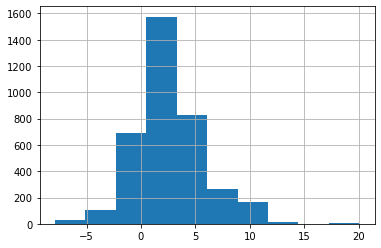

In [137]:
df[df.future_growth.notna()].future_growth.hist()

<AxesSubplot:>

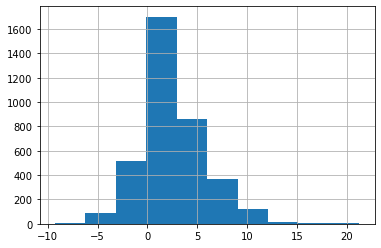

In [138]:
df[df.growth_during.notna()].growth_during.hist()

In [139]:
df.head()

,wb_project_id,country_code,six_overall_rating,wb_government_partner_rating,eval_lag,project_duration,project_name,original_overall_rating,wb_lendingproject_cost,wb_lendinginstrumenttype,...,start_dt,start_year,completion_dt,end_year,prior_growth,future_growth,global_growth_post,growth_during,global_growth_during,global_growth_prior
6496,P057271,GUY,5.0,5.0,365.0,1095.0,Emergency Assistance Project,5.0,10200000.0,ERL,...,1999-01-01,1999,2002-01-01,2002.0,5.204768,2.214560,2.715865,0.701193,1.874423,1.605036
6497,P009674,IND,5.0,NaN,1460.0,2555.0,(DFC) IDBI I,5.0,0.0,FIL,...,1973-09-01,1973,1980-01-01,1980.0,0.983692,2.772003,0.812711,2.598525,1.296964,3.130772
6498,P102095,COL,6.0,6.0,730.0,730.0,(LKD) GPOBA W3: Colombia Natural Gas,6.0,5085000.0,SIL,...,2006-01-01,2006,2008-01-01,2008.0,2.143106,3.301317,0.986290,3.368982,1.160031,1.796690
6500,P043871,BRA,5.0,5.0,365.0,1825.0,(PIAUI)R.POVERTY,5.0,40000000.0,SIL,...,1996-12-12,1996,2002-01-01,2002.0,1.380743,2.841981,2.715865,0.504460,1.742337,0.575542
6502,P010415,PAK,5.0,5.0,365.0,1825.0,1992 FLOOD DAMAGE RE,5.0,397200000.0,ERL,...,1993-04-03,1993,1998-01-01,1998.0,2.881315,1.346714,1.625830,0.542817,1.605036,1.160586


In [140]:
# df.to_csv('../data/initial_output_for_graph.csv', index=False)

In [141]:
len(df)

## Now start to explore causal

In [142]:
# initial graph, code:

In [143]:
df.columns

Index(['wb_project_id', 'country_code', 'six_overall_rating',
       'wb_government_partner_rating', 'eval_lag', 'project_duration',
       'project_name', 'original_overall_rating', 'wb_lendingproject_cost',
       'wb_lendinginstrumenttype', 'wb_qualityatentry_rating',
       'wb_supervisionquality_rating', 'wb_owninstperformance_rating',
       'start_date', 'completion_date', 'evaluation_date', 'start_dt',
       'start_year', 'completion_dt', 'end_year', 'prior_growth',
       'future_growth', 'global_growth_post', 'growth_during',
       'global_growth_during', 'global_growth_prior'],
      dtype='object')

In [144]:
dagity_output_graph = """digraph { 
    "Govt-Quality"[latent];
    six_overall_rating [exposure, label="WB-Loan-Rating"];
    global_growth_during [adjusted, label="GlobalMacroDuringProject"];
    global_growth_post [label="GlobalMacroPostProject"];
    global_growth_prior [adjusted, label="GlobalMacroPriorProject"];
    growth_during [adjusted, label=GrowthDuringProject];
    future_growth [outcome, label=GrowthPostProject];
    prior_growth [adjusted, label=GrowthPriorProject];
    wb_government_partner_rating [label="WBGovtRating"];
    "Govt-Quality" -> six_overall_rating;
    "Govt-Quality" -> prior_growth;
    "Govt-Quality" -> wb_government_partner_rating;
    six_overall_rating -> future_growth;
    global_growth_during -> global_growth_post;
    global_growth_during -> growth_during;
    global_growth_post -> future_growth;
    global_growth_prior -> global_growth_during;
    global_growth_prior -> prior_growth;
    growth_during -> future_growth;
    prior_growth -> growth_during;
    wb_government_partner_rating -> six_overall_rating;
    }"""

In [157]:
len(df.dropna())

In [158]:
model = CausalModel(
    data=df.dropna(),
    graph=dagity_output_graph.replace("\n", " "),
    treatment="six_overall_rating",
    outcome="future_growth"
#     treatment="six_overall_rating",
#     outcome="future_growth",
#     common_causes=["prior_growth"],
#     effect_modifiers=["global_growth_post"],
#     intrumental_variables=["wb_government_partner_rating"]
)

ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. Invalid Input
Trying pydot ...
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['six_overall_rating'] on outcome ['future_growth']


In [159]:
model.view_model()

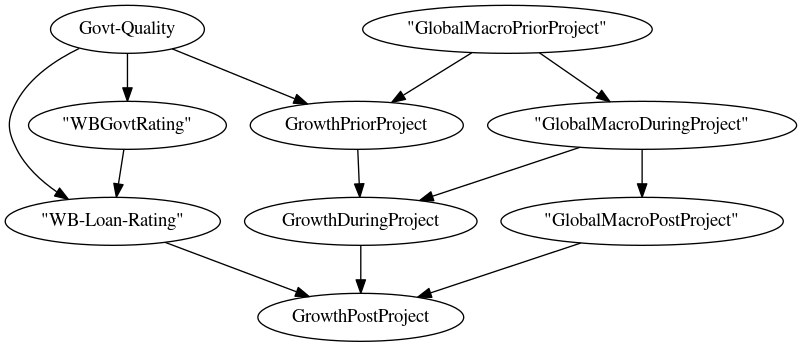

In [160]:
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

In [161]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)

INFO:dowhy.causal_identifier:All common causes are observed. Causal effect can be identified.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]
INFO:dowhy.causal_identifier:Frontdoor variables for treatment and outcome:[]


In [162]:
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor1 (Default)
Estimand expression:
          d                                                                   
─────────────────────(Expectation(future_growth|global_growth_during,prior_gro
d[six_overall_rating]                                                         

                                                                              
wth,global_growth_post,global_growth_prior,growth_during,wb_government_partner
                                                                              

         
_rating))
         
Estimand assumption 1, Unconfoundedness: If U→{six_overall_rating} and U→future_growth then P(future_growth|six_overall_rating,global_growth_during,prior_growth,global_growth_post,global_growth_prior,growth_during,wb_government_partner_rating,U) = P(future_growth|six_overall_rating,global_growth_during,prior_growth,global_growth_post,global_growth_prior,growth_during,wb_government_par

In [163]:
estimate = model.estimate_effect(identified_estimand, 
                                 method_name="backdoor.linear_regression",
                                target_units="att")
print(estimate)

INFO:dowhy.causal_estimator:b: future_growth~six_overall_rating+global_growth_during+prior_growth+global_growth_post+global_growth_prior+growth_during+wb_government_partner_rating+six_overall_rating*global_growth_during+six_overall_rating*prior_growth+six_overall_rating*global_growth_post+six_overall_rating*global_growth_prior+six_overall_rating*growth_during
INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
/home/luke/miniconda3/envs/causal/lib/python3.8/site-packages/dowhy/causal_estimator.py:227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._data[prefix+str(em)] = pd.qcut(self._data[em],
/home/luke/miniconda3/envs/causal/lib/python3.8/site-packages/dowhy/causal_estimator.py:227: SettingWithCopyWarning: 
A value is tryin

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

## Realized estimand
b: future_growth~six_overall_rating+global_growth_during+prior_growth+global_growth_post+global_growth_prior+growth_during+wb_government_partner_rating+six_overall_rating*global_growth_during+six_overall_rating*prior_growth+six_overall_rating*global_growth_post+six_overall_rating*global_growth_prior+six_overall_rating*growth_during
Target units: att

## Estimate
Mean value: -0.0015890155724354038
### Conditional Estimates
__categorical__global_growth_during  __categorical__prior_growth  __categorical__global_growth_post  __categorical__global_growth_prior  __categorical__growth_during
(0.456, 1.161]                       (-25.809, 0.0]               (0.456, 1.305]                     (1.869, 2.716]                      (1.93, 3.461]                  -0.389685
                                                                  (1.305, 1.519]                     (0.595, 1.369]            